In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import time
import skimage.io as io
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist

In [2]:
cd train

/home/mikez/ds/metis/mcnulty_project/bees/train


In [3]:
b  = io.imread('1344.jpg')

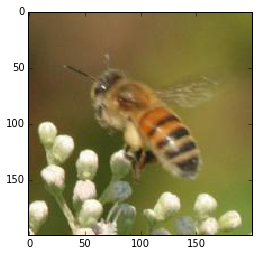

In [4]:
io.imshow(b)
io.show()

In [5]:
print b.shape
print b.size
print b.mean()
print b.min()
print b.max()

(200, 200, 3)
120000
104.113808333
0
255


In [6]:
bee = b

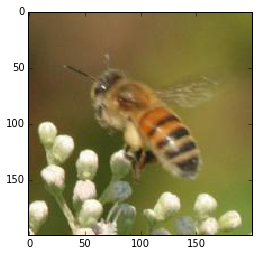

In [7]:
io.imshow(bee)

In [64]:
graybee = rgb2gray(bee)


In [69]:
edges1 = np.invert(feature.canny(graybee))
edges2 =(feature.canny(graybee, sigma=2.4))

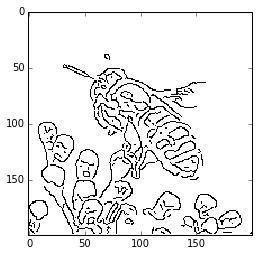

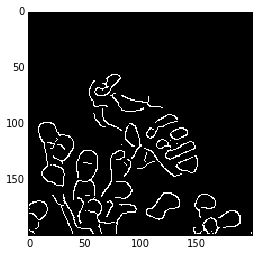

In [70]:
io.imshow(edges1)
io.show()
io.imshow(edges2)

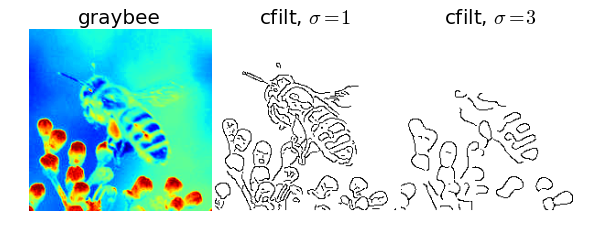

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax1.imshow(graybee, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('graybee', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('cfilt, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('cfilt, $\sigma=3$', fontsize=20)


fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [12]:
fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [13]:
#### df = pd.DataFrame(edges1)
edges1.shape

(200, 200)

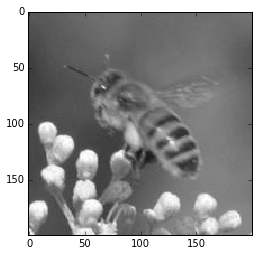

In [11]:
io.imshow(graybee)
io.show()

In [9]:
bwindow = graybee
l_x, l_y = bwindow.shape[0], bwindow.shape[1]
X,Y = np.ogrid[:l_x, :l_y]
outerdisk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2
bwindow[outerdisk_mask] = 0

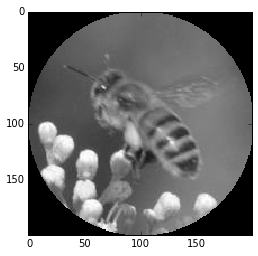

In [10]:
io.imshow(bwindow)

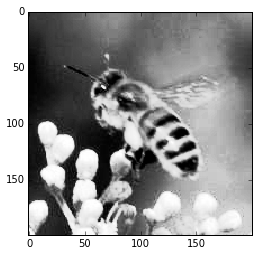

In [13]:
eq_bee = graybee
equalized_image = equalize_hist(eq_bee)
io.imshow(equalized_image)

In [14]:
invertbee = np.invert(graybee)

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

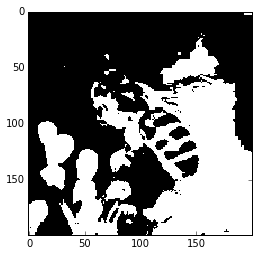

In [15]:
bi_bee = np.where(graybee > np.mean(graybee),1.0,0.0)

io.imshow(bi_bee)


In [16]:
edges1 = np.invert(feature.canny(bi_bee))
edges2 = np.invert(feature.canny(bi_bee, sigma=3))

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

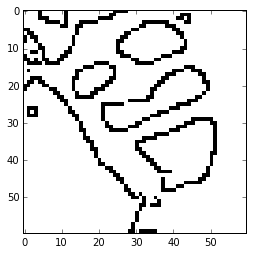

In [17]:
io.imshow(edges1[100:160,100:160])
edges1[100:160,100:160]

In [47]:
def edge_density(edges):
    FalseCount = []
    for array in edges:
        FalseCount.append(list(array).count(False))
    print np.mean(FalseCount)

edge_density(edges1[100:160,100:160])


6.96666666667
